<a href="https://colab.research.google.com/github/saradom11/M-todos-num-ricos-1/blob/main/Pivoteo_parcial_escalado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pivoteo parcial escalonado:**
#### Escribir un programa en Python que implemente el Algoritmo 6.3 para resolver ecuaciones lineales (página 284 del Burden). Como prueba, resuelva el Ejemplo 3 de la página 284.

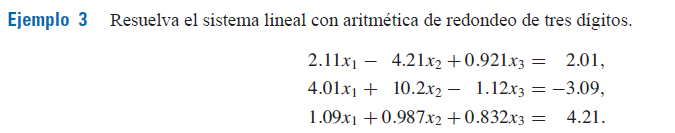

In [1]:
# Primero importamos la librería
import numpy as np

In [2]:
# Ingresamos los datos
A = [[2.11, -4.21, 0.921],
     [4.01, 10.2, -1.12],
     [1.09, 0.987, 0.832]]  # La matriz de coeficientes del sistema lineal

b = [2.01, -3.09, 4.21]   # La matriz de términos independientes

In [3]:
# Número de ecuaciones
n = len(A)

# Inicializamos el indicador de fila
NROW = list(range(n))

# Realizamos la matriz aumentada
A = np.array(A, dtype=float)   # Convertimos lo que ingresamos en A a un arreglo de numpy
b = np.array(b, dtype=float)   # Convertimos lo que ingresamos en b a un arreglo de numpy
Aug = np.column_stack((A, b))  # Crea la matriz aumentada [A | b]

In [4]:
# Escalado para cada fila
s = [max(abs(row)) for row in Aug[:, :-1]]

# Comenzamos con el proceso de eliminación:

for i in range(n):
    # Encontrar el pivote escalonado (p)
    p = max(range(i, n), key=lambda k: abs(Aug[NROW[k], i] / s[NROW[k]]))   # Calculamos el valor escalado de cada fila en la columna actual
    if abs(Aug[NROW[p], i]) == 0:   # Si el valor del pivote es cero, el sistema no tiene solución única y se detiene el proceso
        print("No existe solución única")
        break
    # Simular intercambio de filas
    if NROW[i] != NROW[p]:
        NROW[i], NROW[p] = NROW[p], NROW[i]  # Intercambiamos las filas sin modificar la matriz aumentada
    # Eliminación
    for j in range(i + 1, n):
        m = Aug[NROW[j], i] / Aug[NROW[i], i]   # Determinamos "m" (con la fórmula)
        Aug[NROW[j], i:] -= m * Aug[NROW[i], i:]  # Hacemos que los elementos debajo del pivote se conviertan en cero


In [5]:
# Sustitución hacia atrás
x = np.zeros(n)   # Inicializamos el vector solución
for i in range(n - 1, -1, -1):  # Comenzamos desde la última fila y resolvemos hacia arriba
    suma = sum(Aug[NROW[i], j] * x[j] for j in range(i + 1, n))
    x[i] = (Aug[NROW[i], -1] - suma) / Aug[NROW[i], i]  # Determinamos x_i

# Imprimir la solución
print("Solución aproximada del sistema:")
for i, xi in enumerate(x, start=1):  # Por último, imprimimos cada valor de la solución x con tres decimales
    print(f"x{i} = {xi:.3f}")

Solución aproximada del sistema:
x1 = -0.428
x2 = 0.427
x3 = 5.114
